In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

import cv2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from collections import defaultdict



DIVIDIR VIDEO EN FRAGMENTOS

Primero de todo, subiremos los videos que queramos dividirlos en frames las analizaremos. Ya que los videos tienen bastantes frames, guardaremos solo uno de cada 4.

In [2]:
def process_video(video_path, existing_videos_counter):
    # Abrir el video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file {video_path}")
        return
    
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    
    # Calcular el número total de frames
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in {video_name}: {total_frames}")
    
    # Contar instancias del mismo nombre de video
    if video_name in existing_videos_counter:
        existing_videos_counter[video_name] += 1
    else:
        existing_videos_counter[video_name] = 1
    video_instance = existing_videos_counter[video_name]
    
    # Crear el directorio de salida si no existe
    output_dir = "gestos_frames"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Extraer y guardar los frames
    frame_instance_count = 1
    frame_num = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        if frame_num % 4 == 0:
            frame_filename = os.path.join(output_dir, f"{video_name}_{video_instance}_{frame_instance_count}.png")
            cv2.imwrite(frame_filename, frame)
            frame_instance_count += 1
        
        frame_num += 1

    cap.release()
    print(f"Frames saved in {output_dir}")

def find_videos_in_folder(folder_path):
    video_extensions = ('.mov', '.mp4')
    video_paths = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(video_extensions):
                video_paths.append(os.path.join(root, file))
    return video_paths

# Directorio de entrada
input_folder = "25gestos"  # Cambia esto por la ruta de tu carpeta

# Diccionario para contar instancias de nombres de video
existing_videos_counter = defaultdict(int)

# Encontrar todos los videos en la carpeta
video_paths = find_videos_in_folder(input_folder)

# Procesar cada video
for video_path in video_paths:
    process_video(video_path, existing_videos_counter)


Total frames in abanico_1: 78
Frames saved in gestos_frames
Total frames in abanico_2: 150
Frames saved in gestos_frames
Total frames in abuelo_1: 62
Frames saved in gestos_frames
Total frames in abuelo_2: 140
Frames saved in gestos_frames
Total frames in aprender_1: 64
Frames saved in gestos_frames
Total frames in aprender_2: 151
Frames saved in gestos_frames
Total frames in barba_1: 70
Frames saved in gestos_frames
Total frames in barba_2: 150
Frames saved in gestos_frames
Total frames in cabeza_1: 73
Frames saved in gestos_frames
Total frames in cabeza_2: 151
Frames saved in gestos_frames
Total frames in celebrar_1: 51
Frames saved in gestos_frames
Total frames in celebrar_2: 91
Frames saved in gestos_frames
Total frames in coser_1: 55
Frames saved in gestos_frames
Total frames in coser_2: 91
Frames saved in gestos_frames
Total frames in ingeniero_1: 72
Frames saved in gestos_frames
Total frames in ingeniero_2: 184
Frames saved in gestos_frames
Total frames in libertad_1: 60
Frames 

MOVIMIENTO ENTRE FRAMES

Una vez tengamos los frames, queremos saber el movimiendo que hay de un frame a otro para saber si tenemos dos imagenes repetitivas o no. 

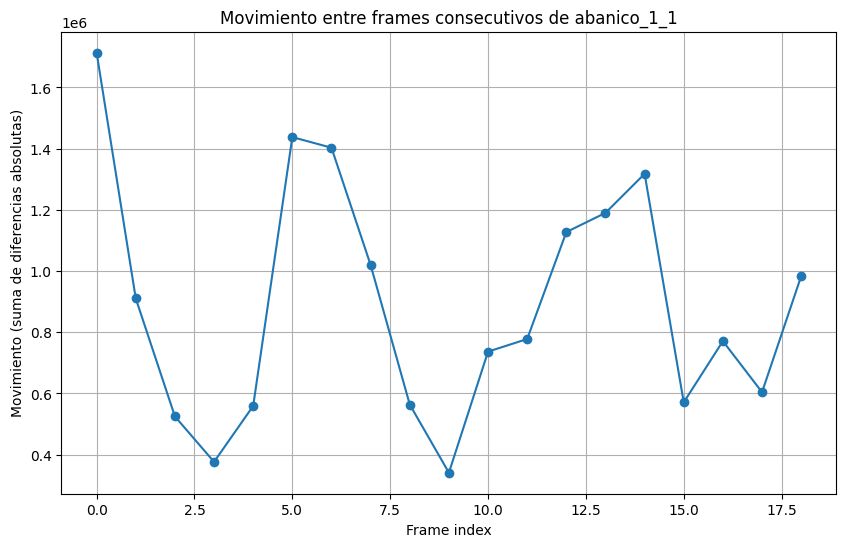

Motion analysis saved in gestos_frames\abanico_1_1_motion.txt


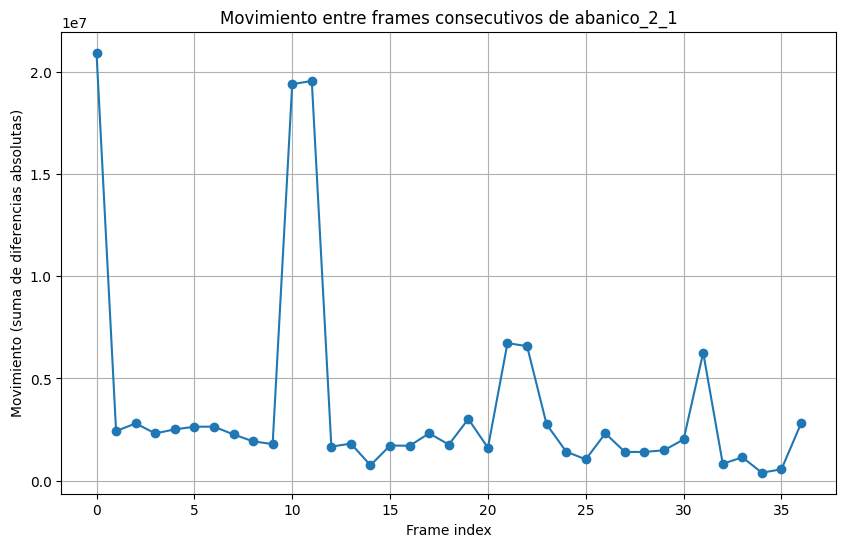

Motion analysis saved in gestos_frames\abanico_2_1_motion.txt


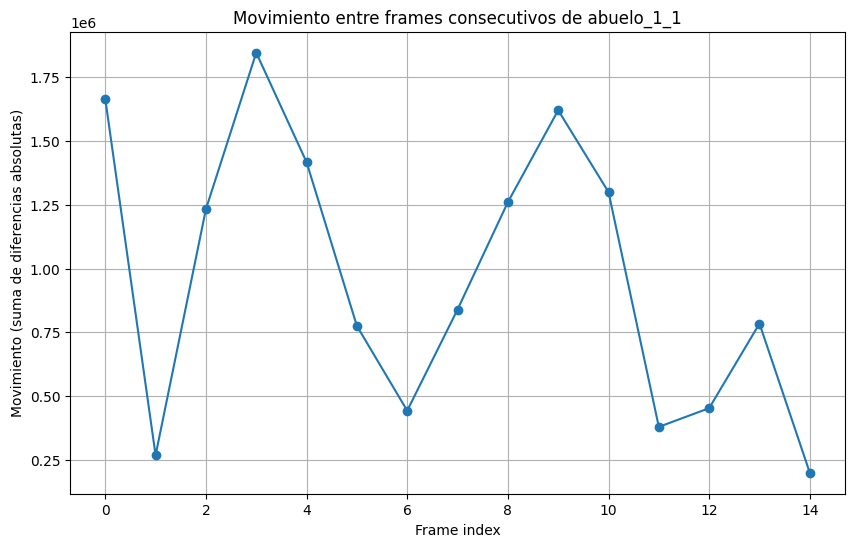

Motion analysis saved in gestos_frames\abuelo_1_1_motion.txt


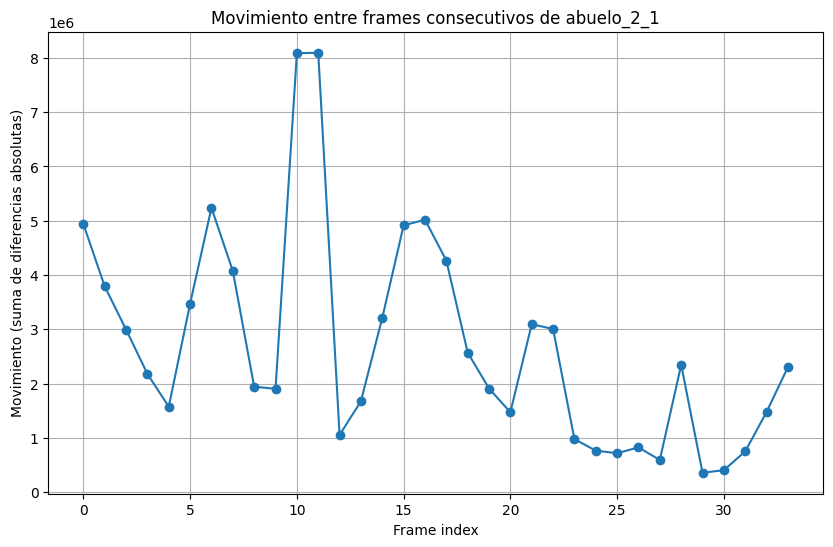

Motion analysis saved in gestos_frames\abuelo_2_1_motion.txt


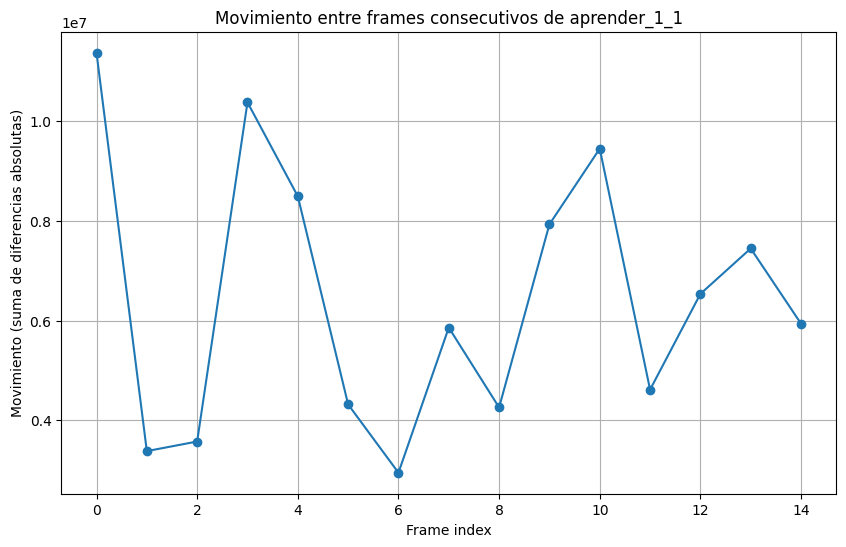

Motion analysis saved in gestos_frames\aprender_1_1_motion.txt


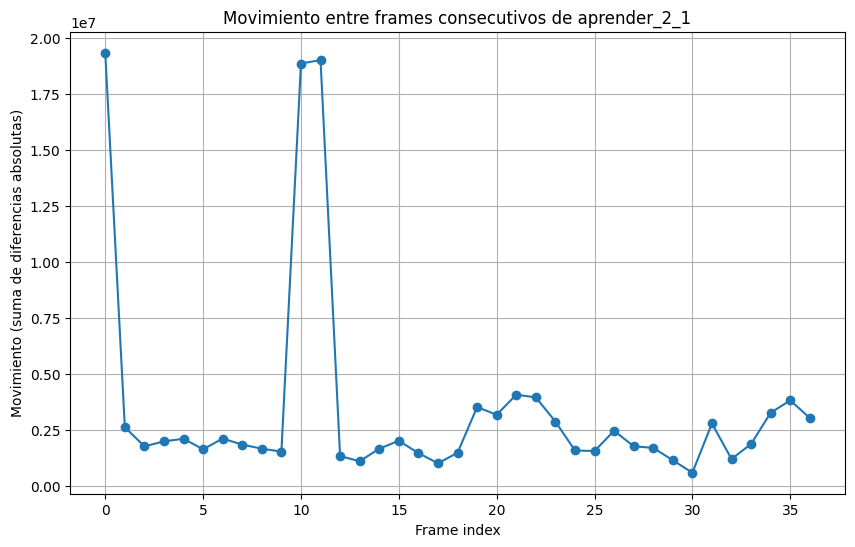

Motion analysis saved in gestos_frames\aprender_2_1_motion.txt


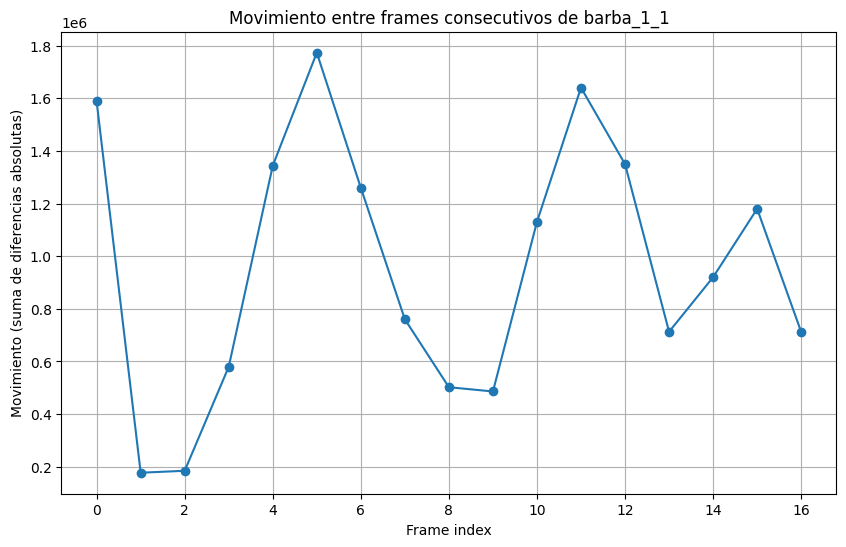

Motion analysis saved in gestos_frames\barba_1_1_motion.txt


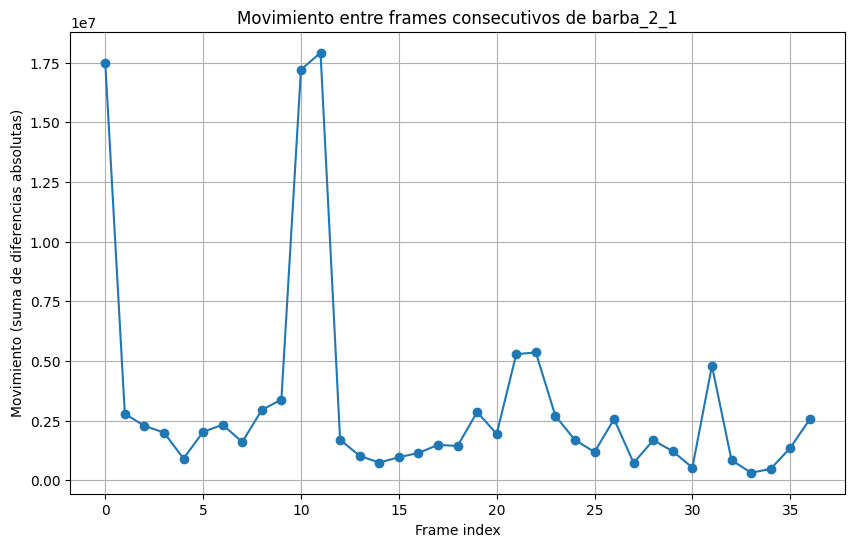

Motion analysis saved in gestos_frames\barba_2_1_motion.txt


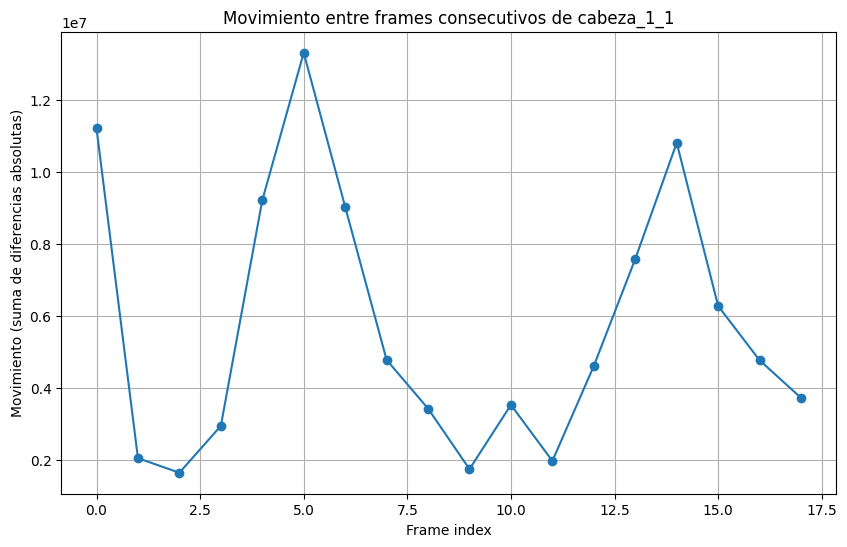

Motion analysis saved in gestos_frames\cabeza_1_1_motion.txt


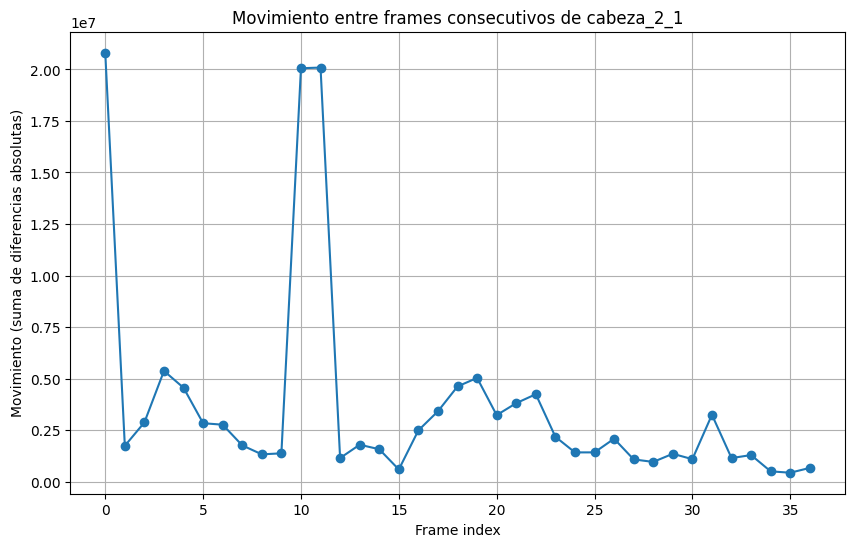

Motion analysis saved in gestos_frames\cabeza_2_1_motion.txt


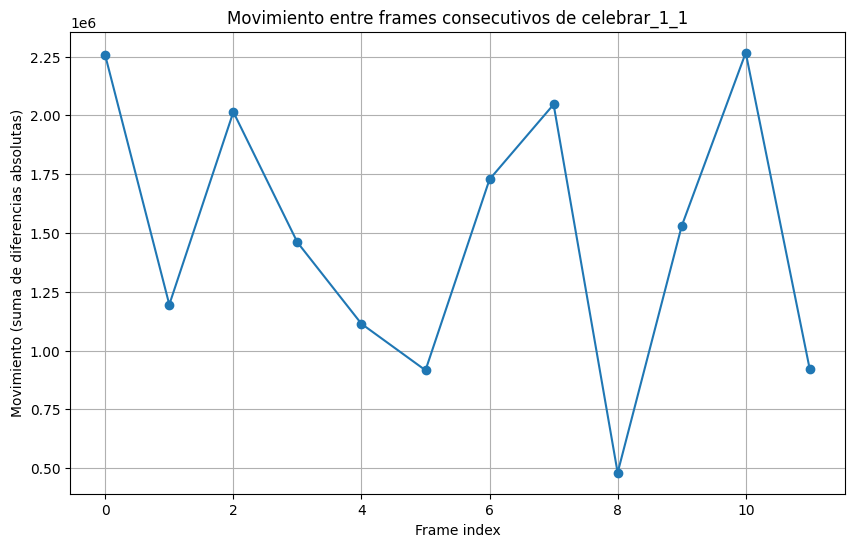

Motion analysis saved in gestos_frames\celebrar_1_1_motion.txt


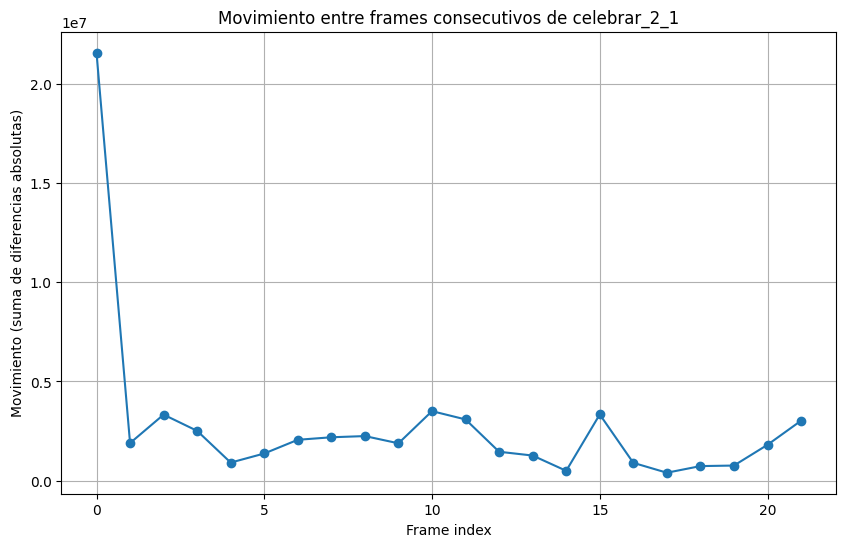

Motion analysis saved in gestos_frames\celebrar_2_1_motion.txt


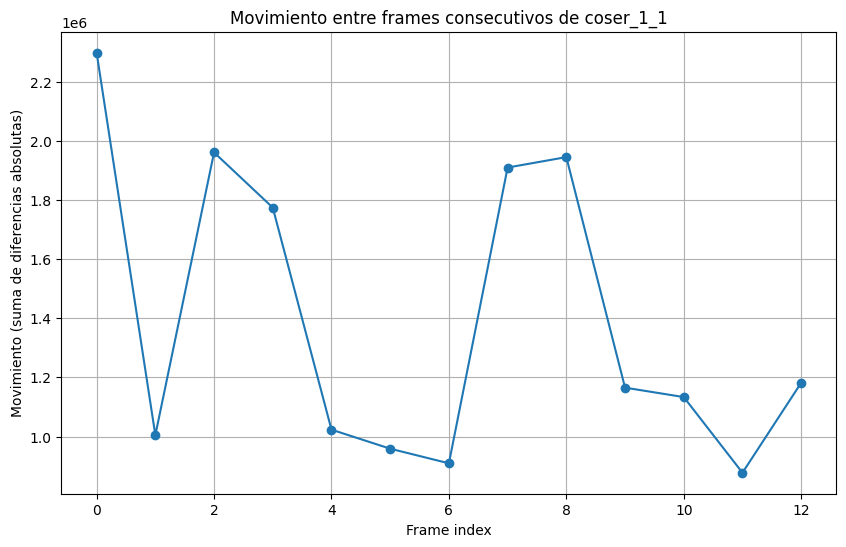

Motion analysis saved in gestos_frames\coser_1_1_motion.txt


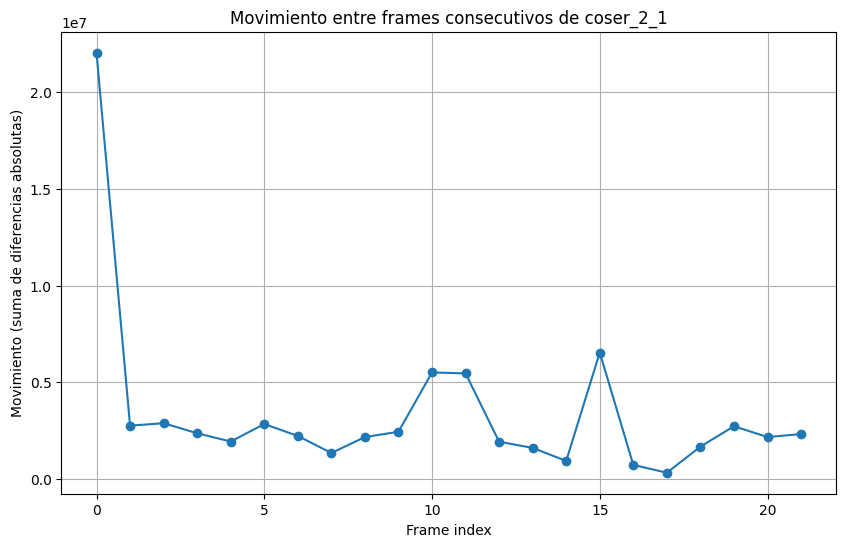

Motion analysis saved in gestos_frames\coser_2_1_motion.txt


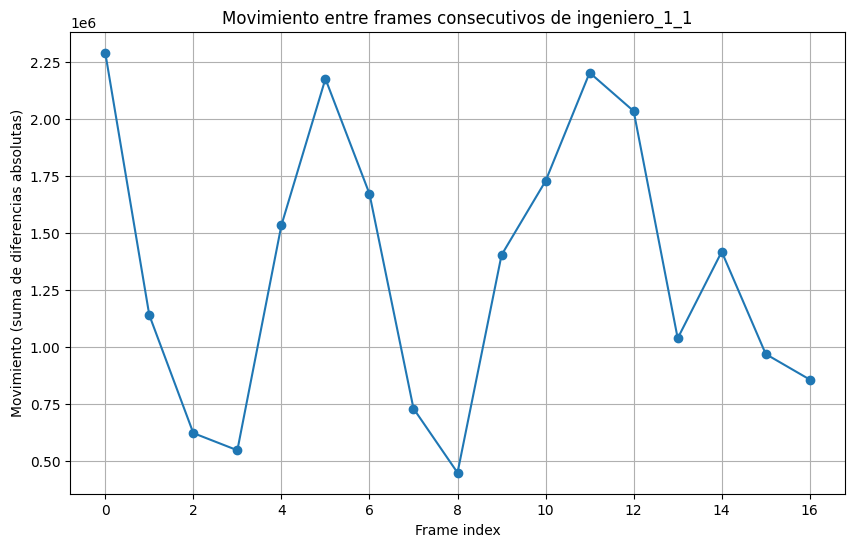

Motion analysis saved in gestos_frames\ingeniero_1_1_motion.txt


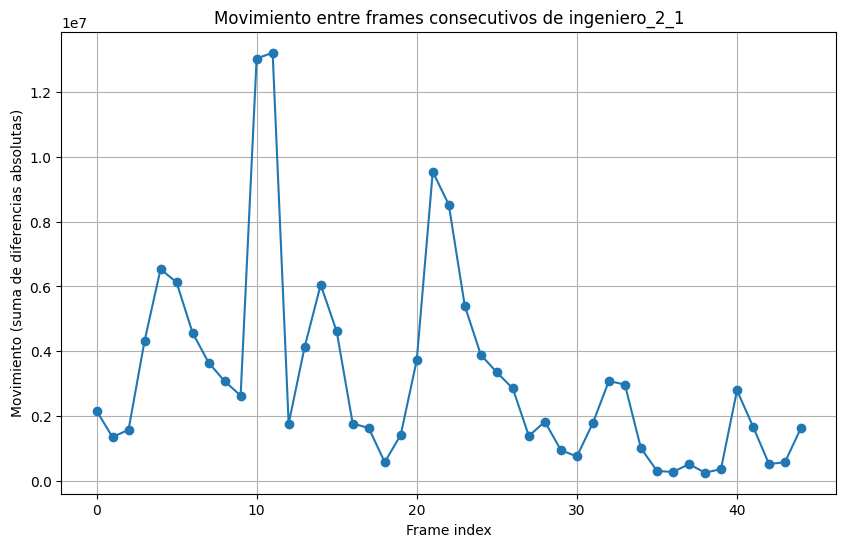

Motion analysis saved in gestos_frames\ingeniero_2_1_motion.txt


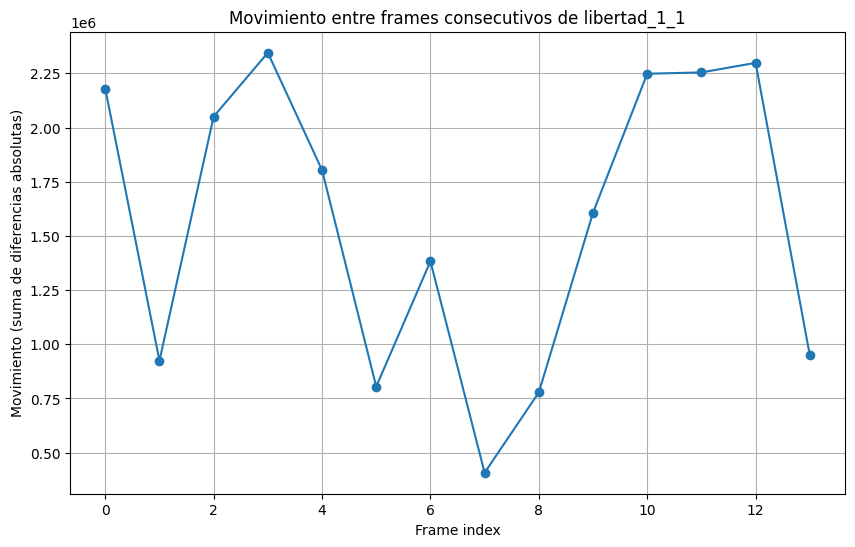

Motion analysis saved in gestos_frames\libertad_1_1_motion.txt


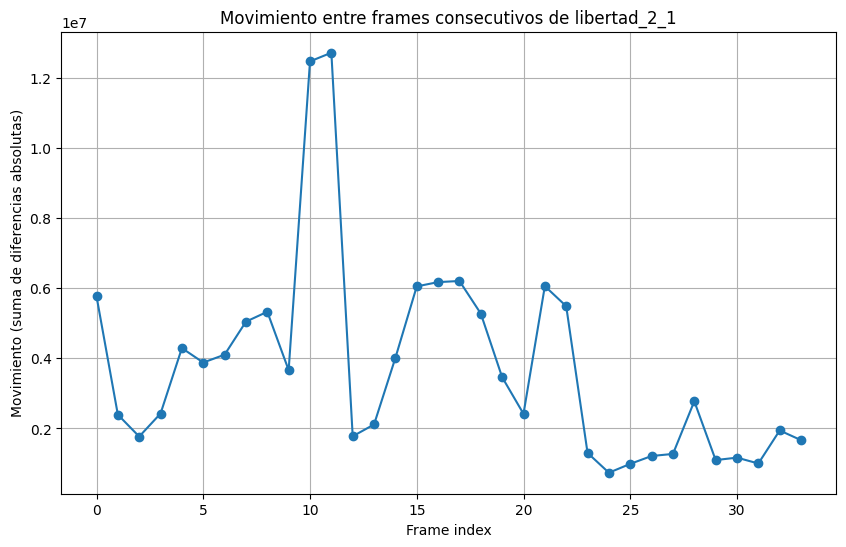

Motion analysis saved in gestos_frames\libertad_2_1_motion.txt


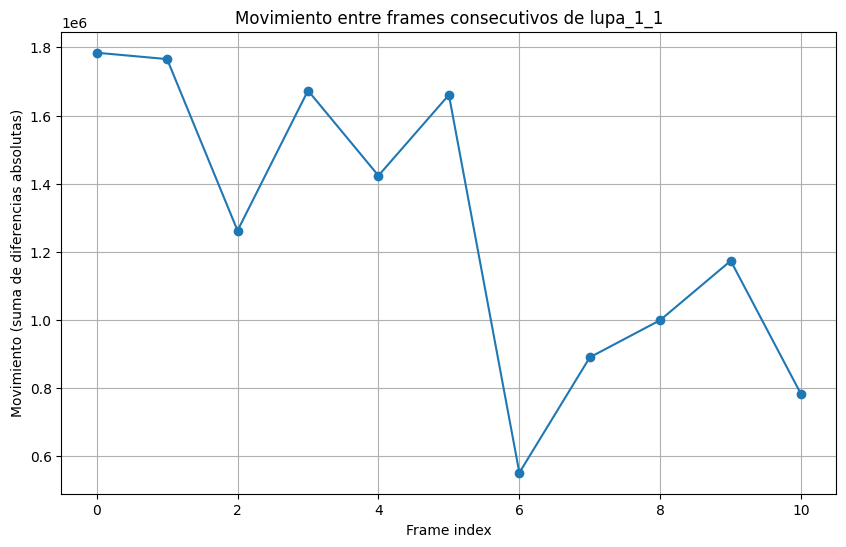

Motion analysis saved in gestos_frames\lupa_1_1_motion.txt


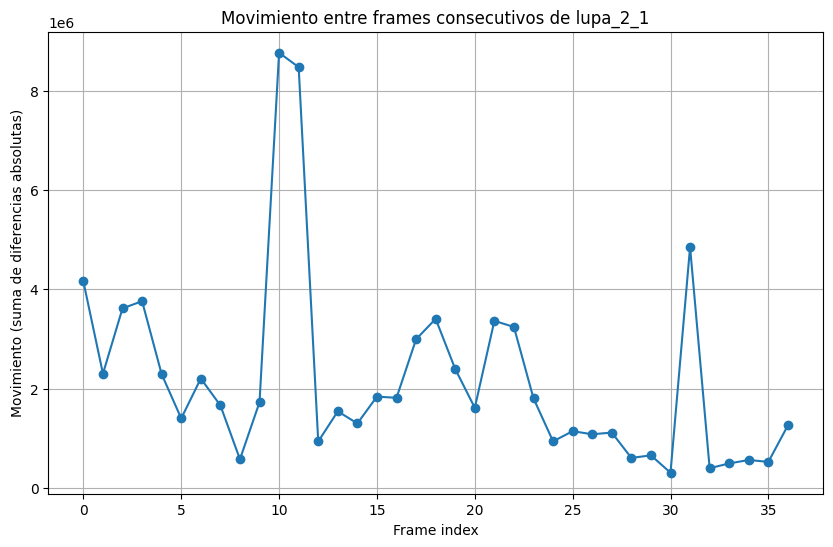

Motion analysis saved in gestos_frames\lupa_2_1_motion.txt


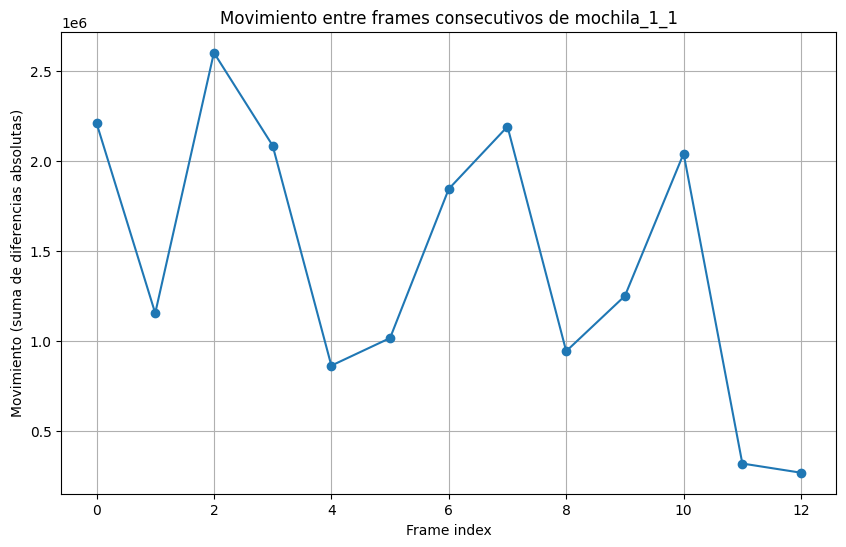

Motion analysis saved in gestos_frames\mochila_1_1_motion.txt


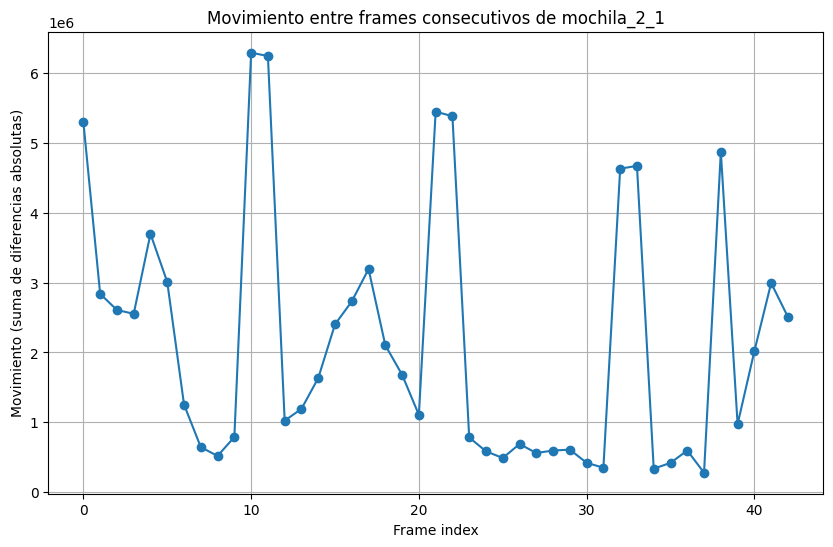

Motion analysis saved in gestos_frames\mochila_2_1_motion.txt


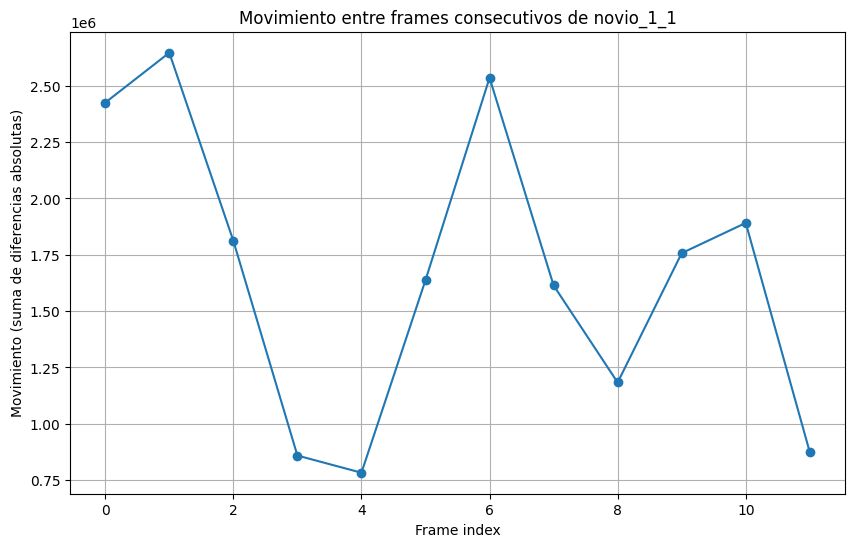

Motion analysis saved in gestos_frames\novio_1_1_motion.txt


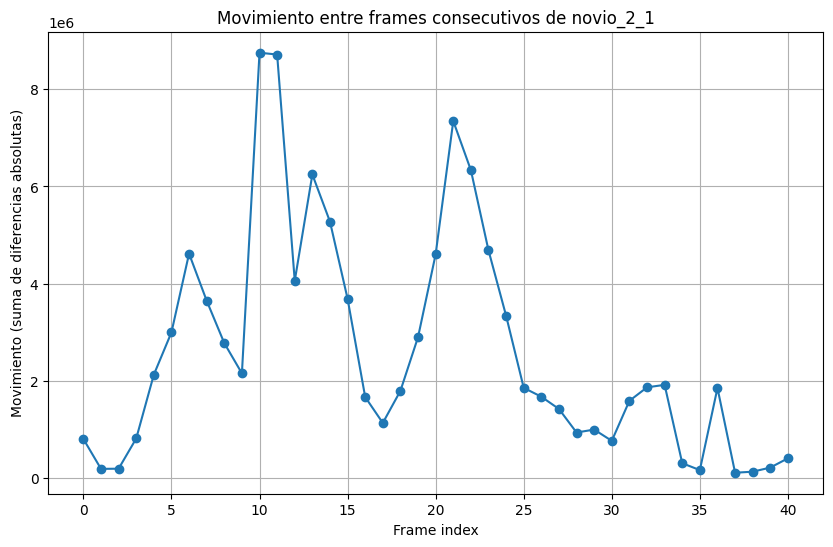

Motion analysis saved in gestos_frames\novio_2_1_motion.txt


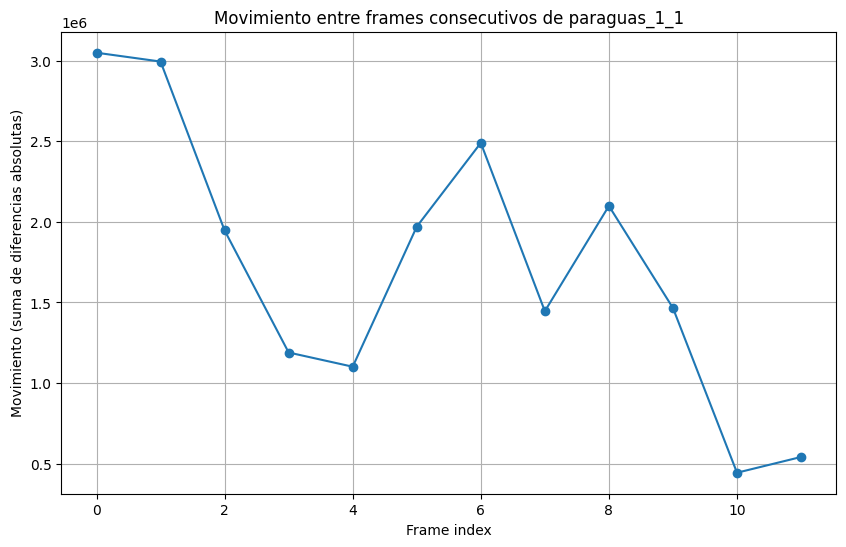

Motion analysis saved in gestos_frames\paraguas_1_1_motion.txt


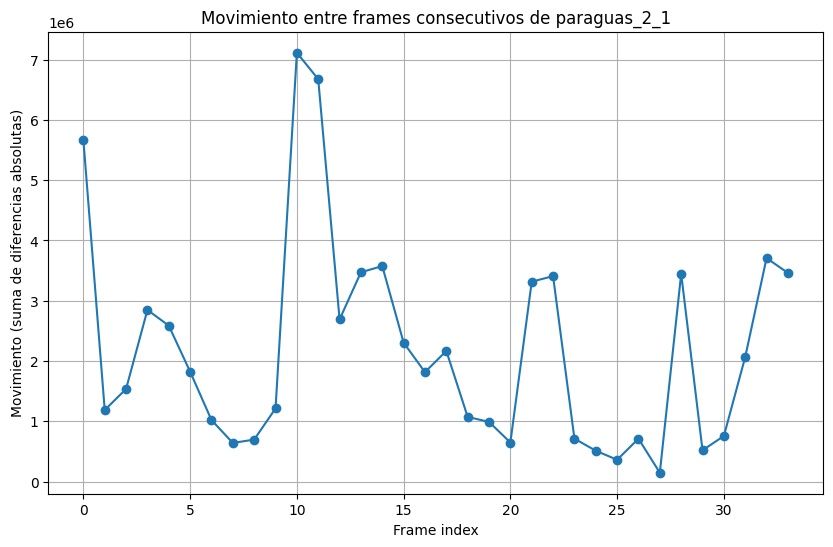

Motion analysis saved in gestos_frames\paraguas_2_1_motion.txt


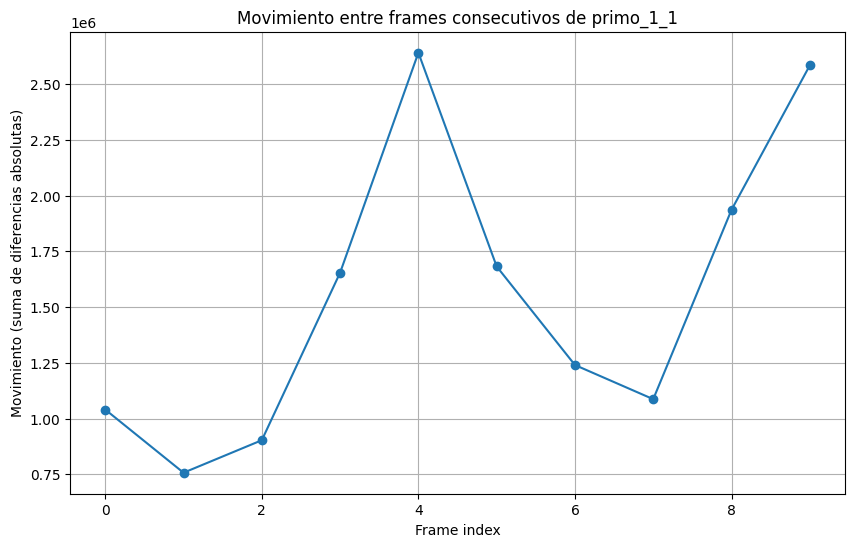

Motion analysis saved in gestos_frames\primo_1_1_motion.txt


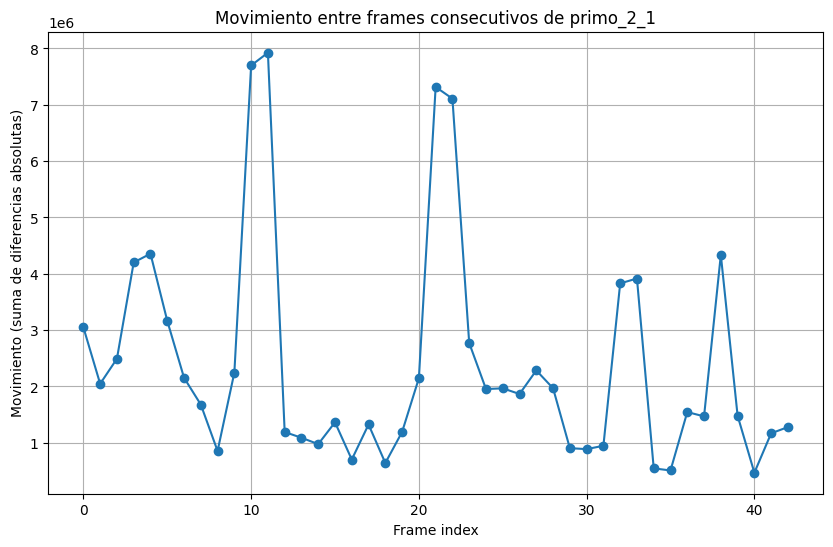

Motion analysis saved in gestos_frames\primo_2_1_motion.txt


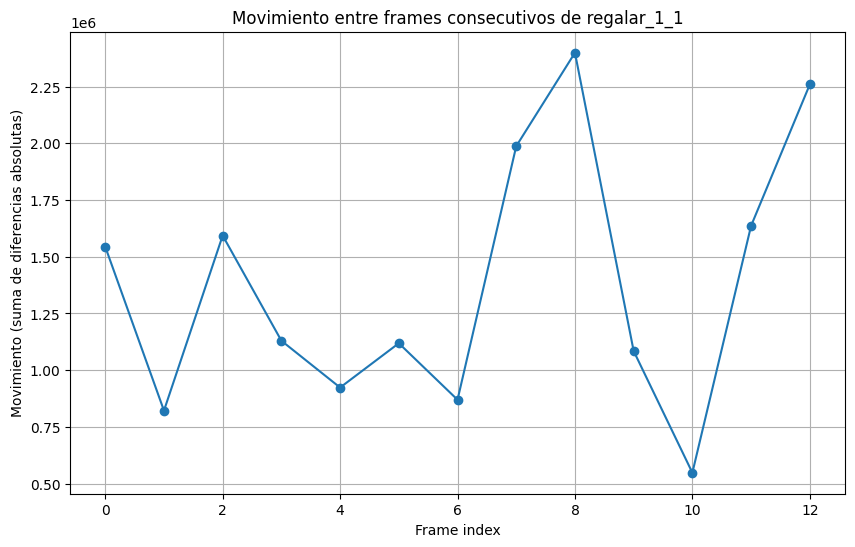

Motion analysis saved in gestos_frames\regalar_1_1_motion.txt


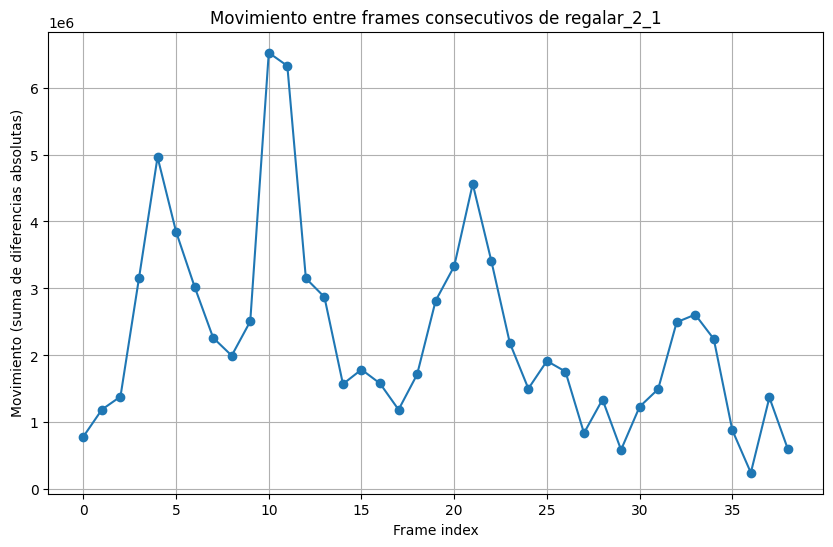

Motion analysis saved in gestos_frames\regalar_2_1_motion.txt


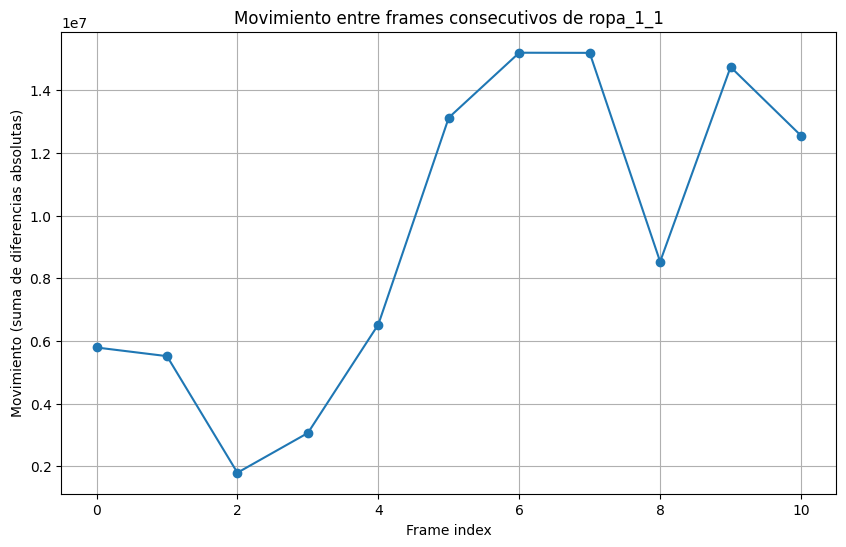

Motion analysis saved in gestos_frames\ropa_1_1_motion.txt


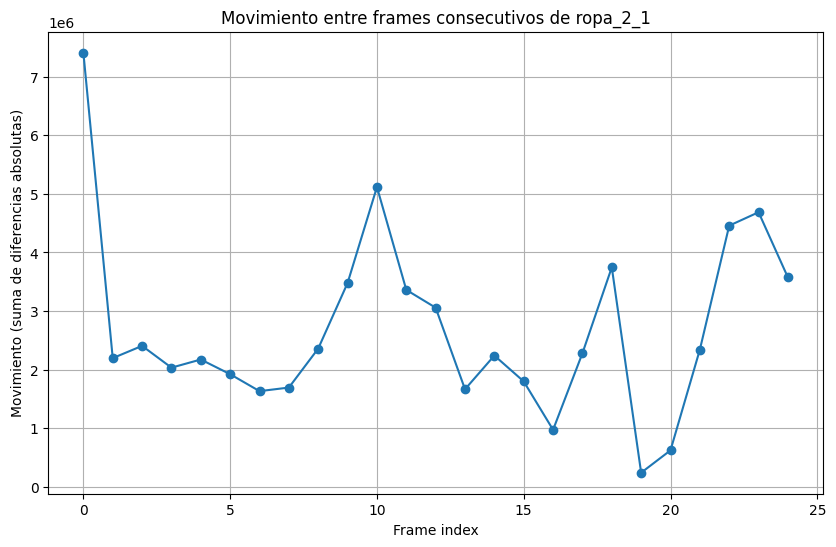

Motion analysis saved in gestos_frames\ropa_2_1_motion.txt


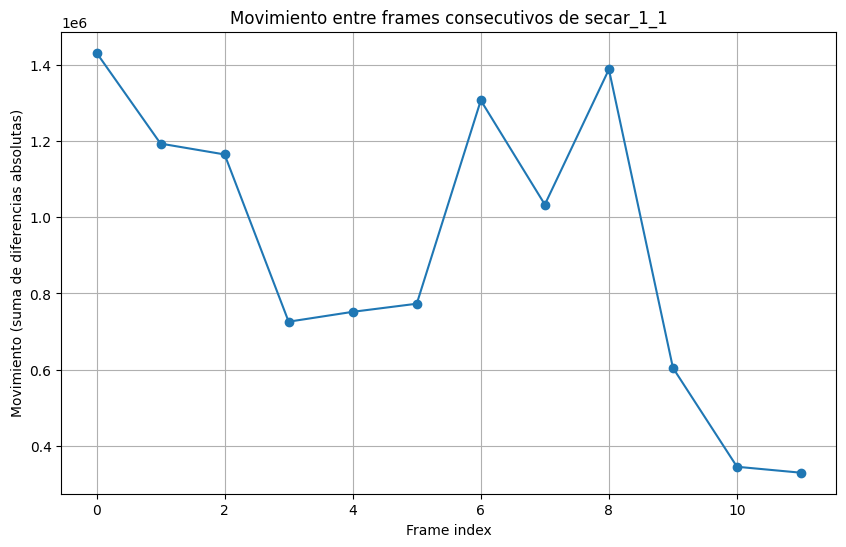

Motion analysis saved in gestos_frames\secar_1_1_motion.txt


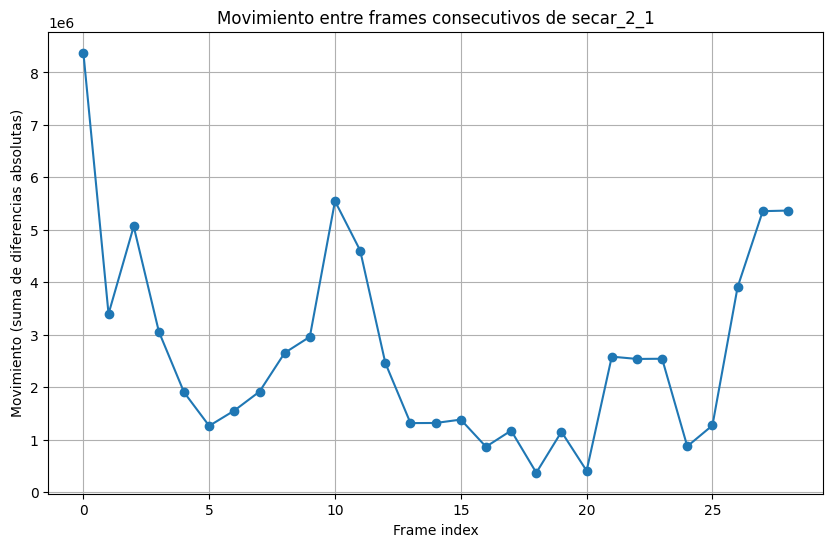

Motion analysis saved in gestos_frames\secar_2_1_motion.txt


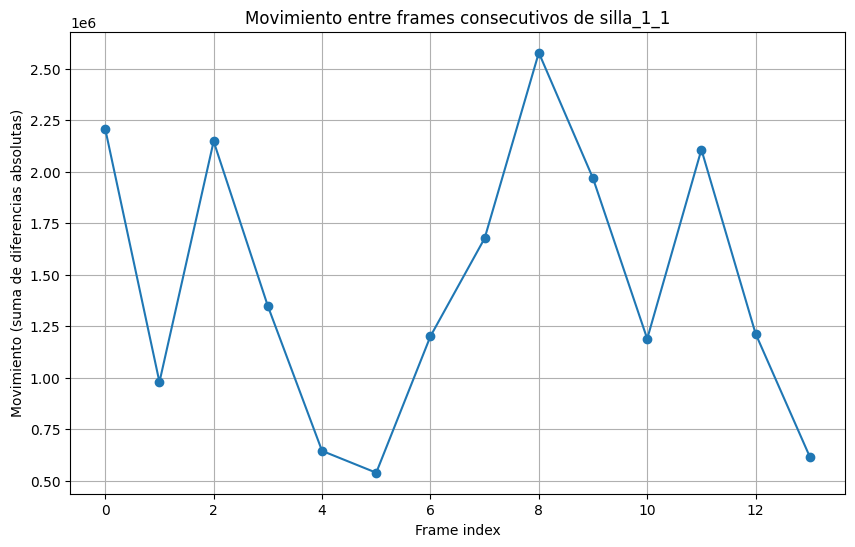

Motion analysis saved in gestos_frames\silla_1_1_motion.txt


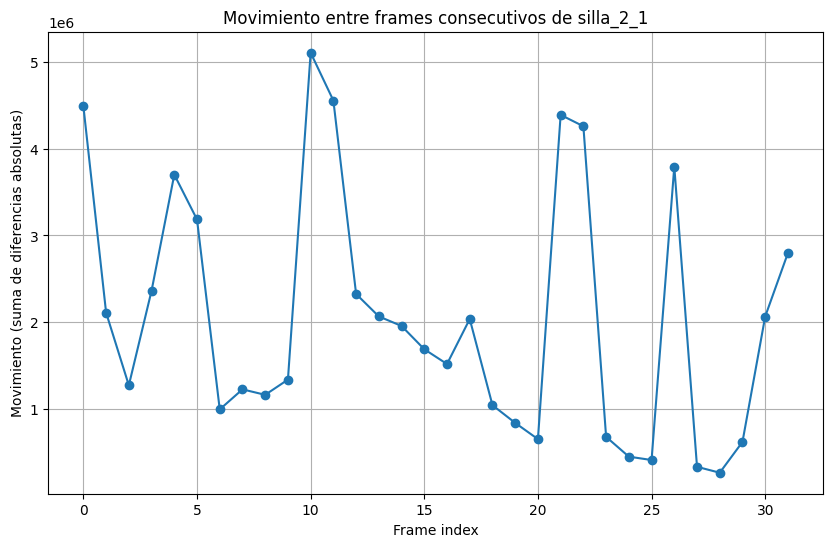

Motion analysis saved in gestos_frames\silla_2_1_motion.txt


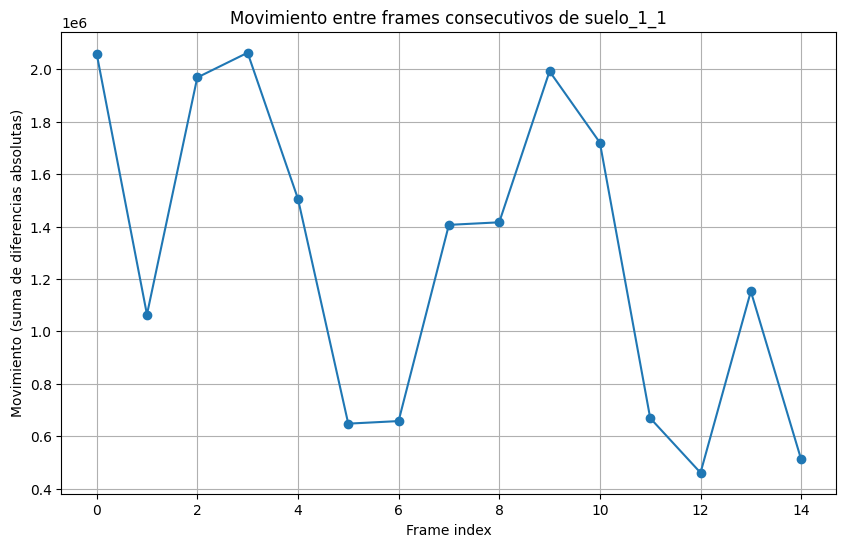

Motion analysis saved in gestos_frames\suelo_1_1_motion.txt


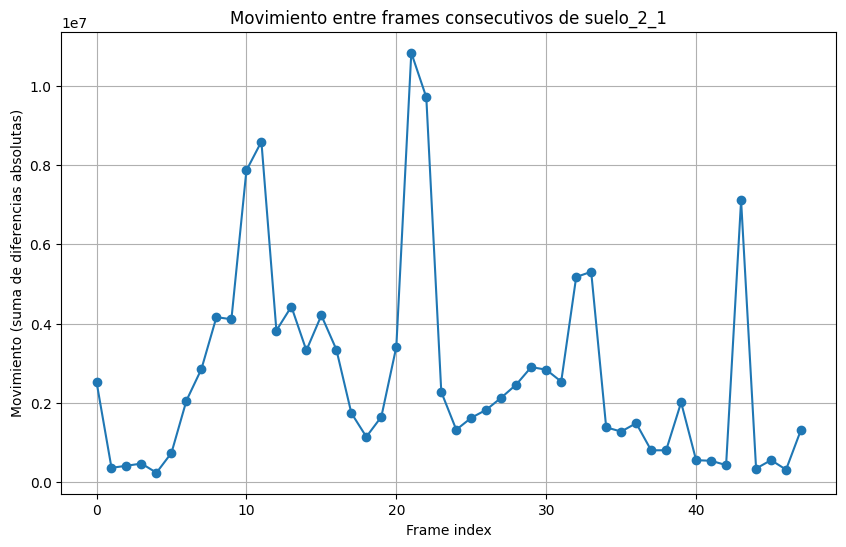

Motion analysis saved in gestos_frames\suelo_2_1_motion.txt


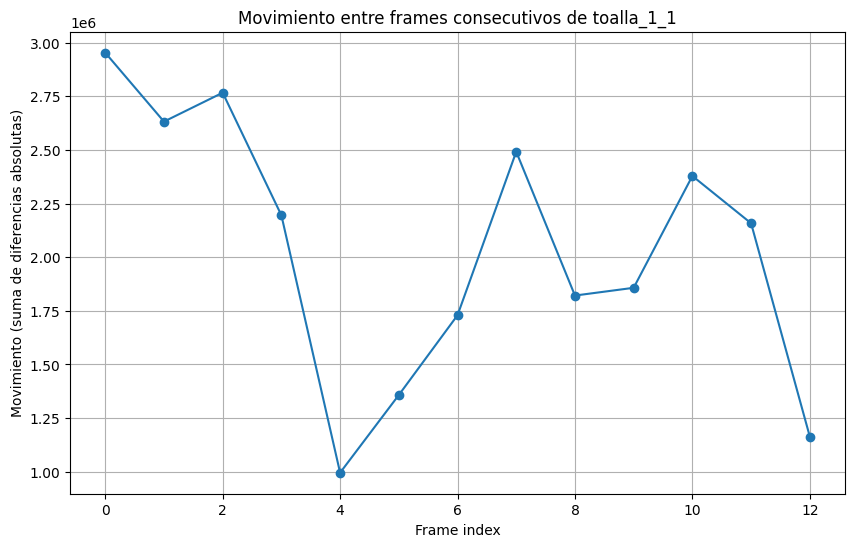

Motion analysis saved in gestos_frames\toalla_1_1_motion.txt


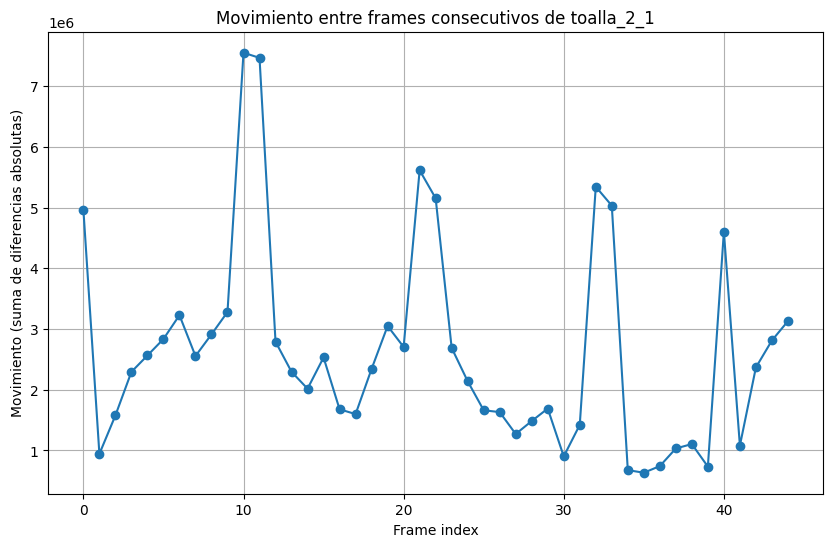

Motion analysis saved in gestos_frames\toalla_2_1_motion.txt


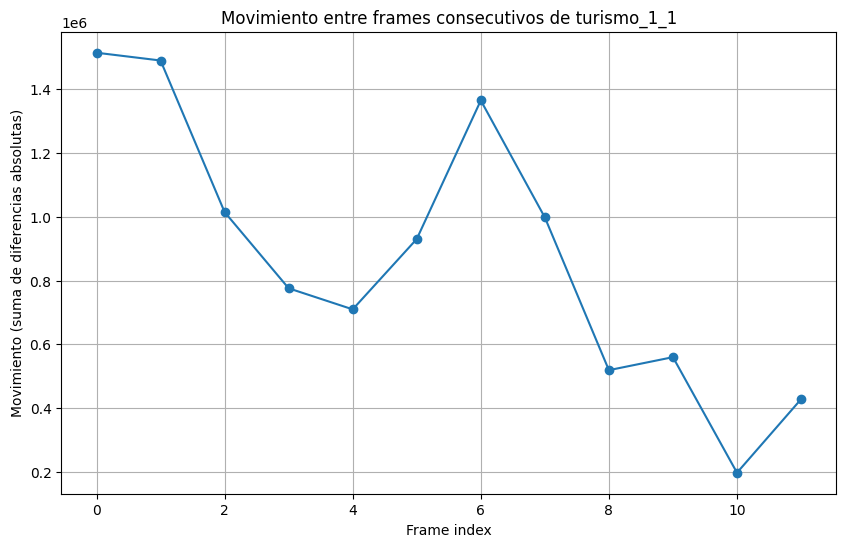

Motion analysis saved in gestos_frames\turismo_1_1_motion.txt


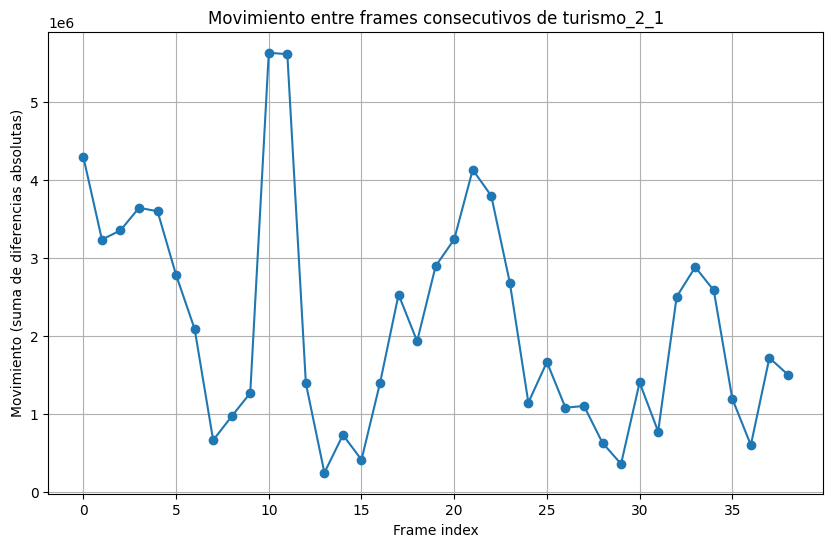

Motion analysis saved in gestos_frames\turismo_2_1_motion.txt


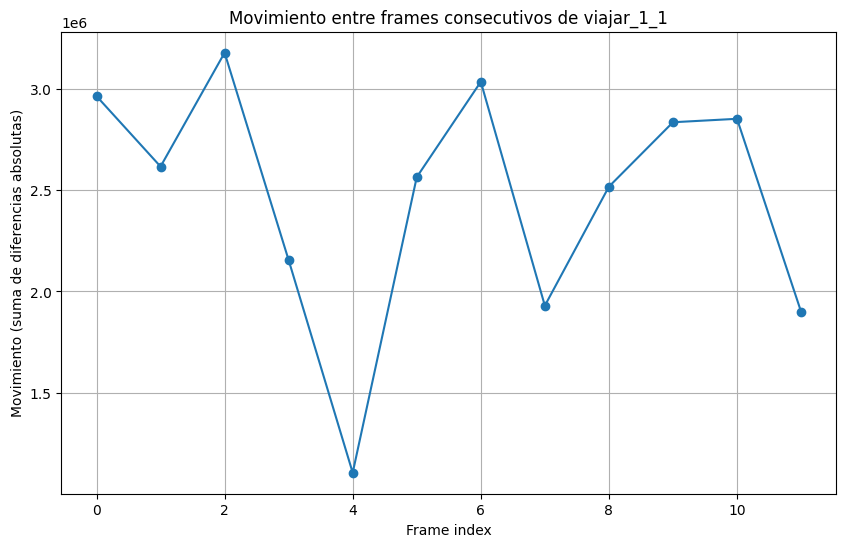

Motion analysis saved in gestos_frames\viajar_1_1_motion.txt


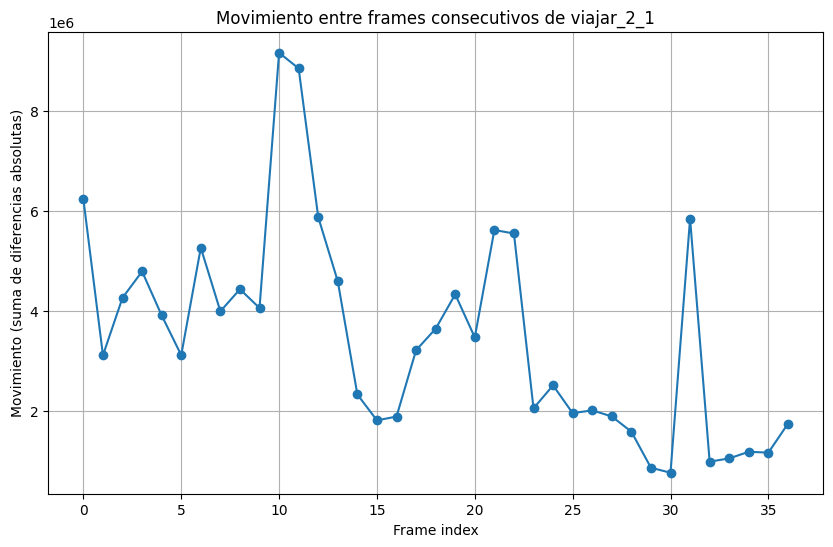

Motion analysis saved in gestos_frames\viajar_2_1_motion.txt


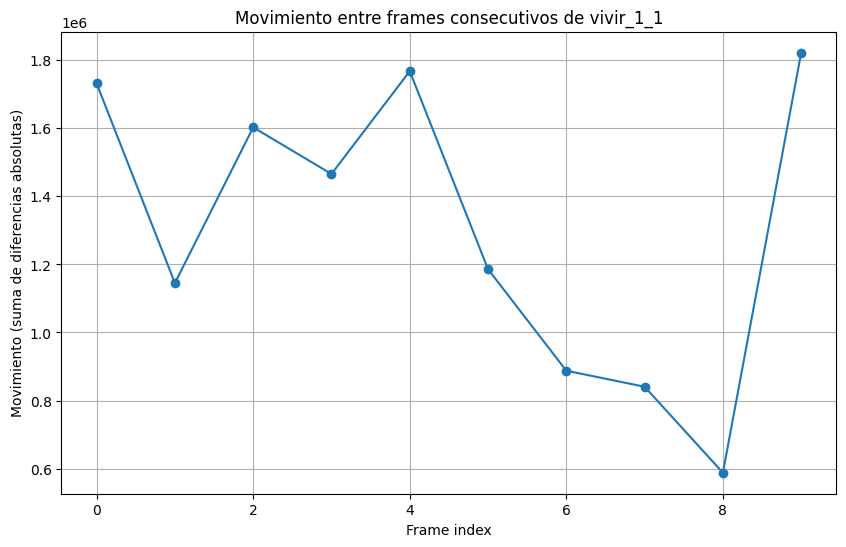

Motion analysis saved in gestos_frames\vivir_1_1_motion.txt


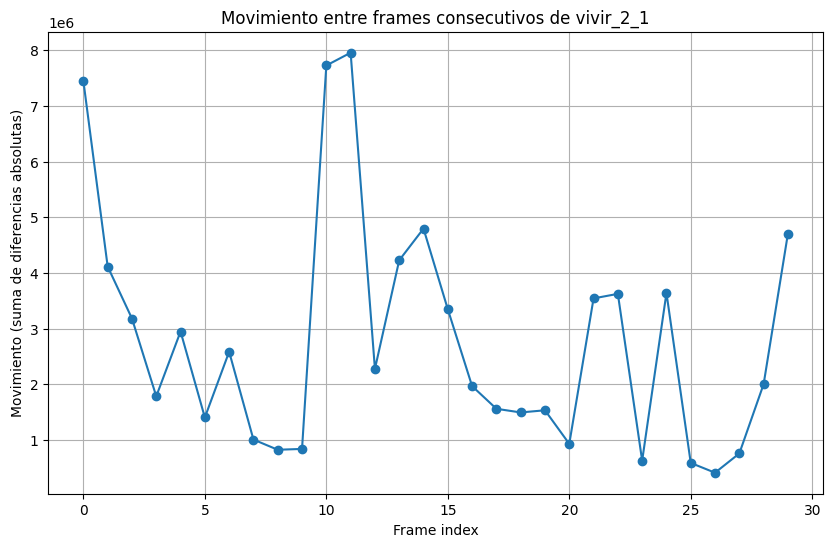

Motion analysis saved in gestos_frames\vivir_2_1_motion.txt


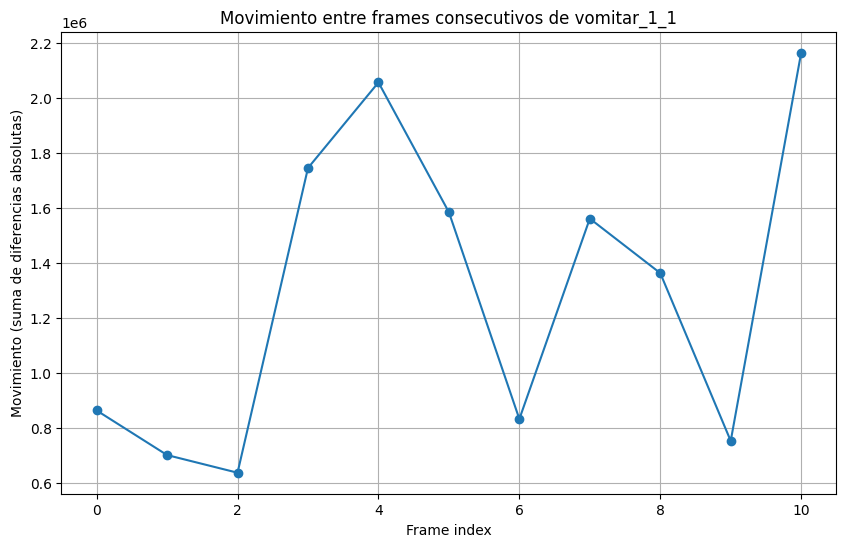

Motion analysis saved in gestos_frames\vomitar_1_1_motion.txt


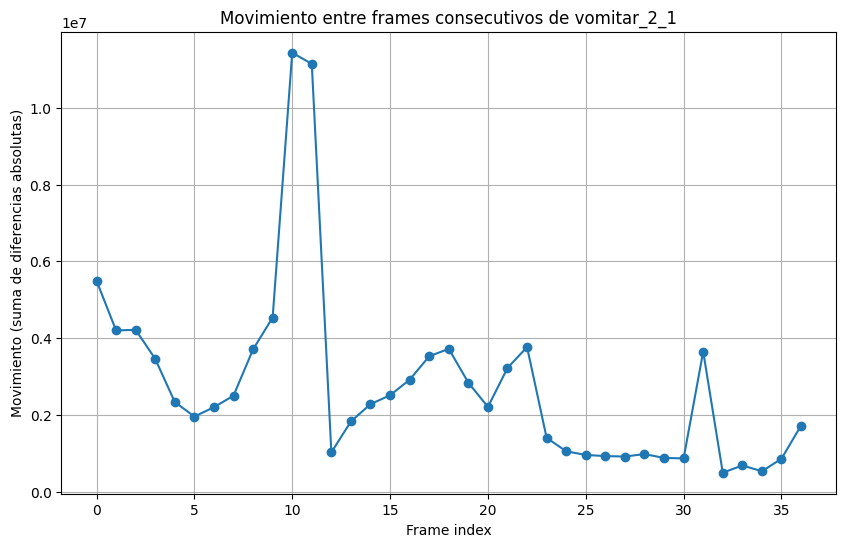

Motion analysis saved in gestos_frames\vomitar_2_1_motion.txt


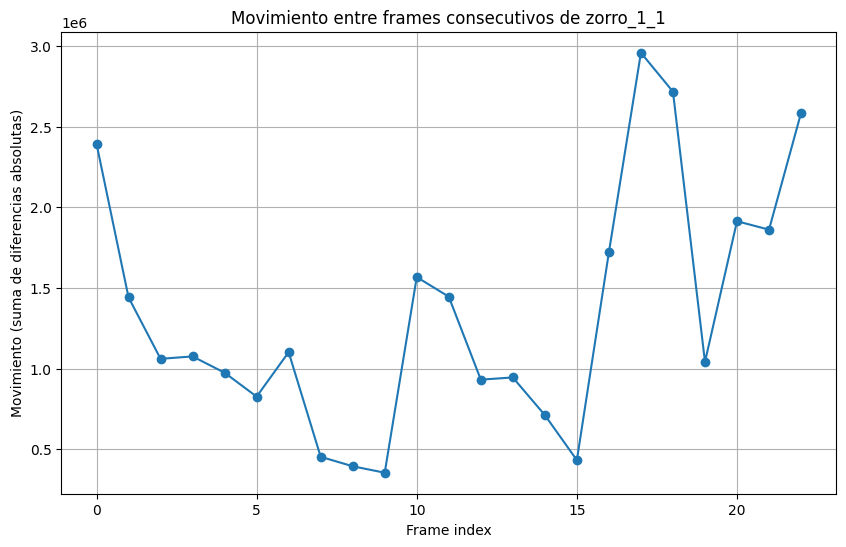

Motion analysis saved in gestos_frames\zorro_1_1_motion.txt


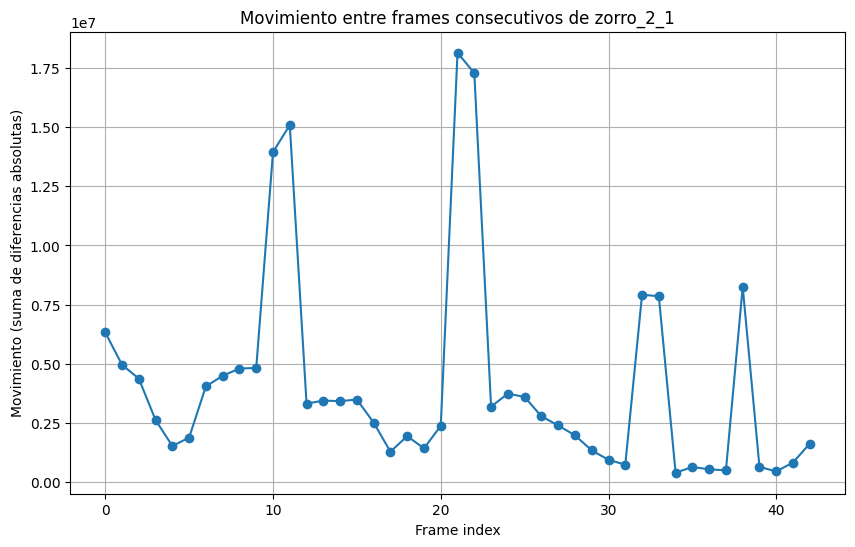

Motion analysis saved in gestos_frames\zorro_2_1_motion.txt


In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_frames_in_folder(frames_folder, threshold=30):
    # Obtener una lista de los archivos de frames en la carpeta
    frame_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.png')])

    if not frame_files:
        print(f"No frame files found in folder {frames_folder}")
        return
    
    # Agrupar los frames por nombre de video e instancia
    grouped_frames = defaultdict(list)
    for frame_file in frame_files:
        # Extraer el nombre base y la instancia del archivo
        base_name = '_'.join(frame_file.split('_')[:-1])  # Incluye nombre y número
        grouped_frames[base_name].append(os.path.join(frames_folder, frame_file))

    for base_name, frames in grouped_frames.items():
        analyze_and_plot(frames, base_name, threshold)

def analyze_and_plot(frames, base_name, threshold):
    prev_frame = None
    motion_metrics = []

    for frame_file in frames:
        frame = cv2.imread(frame_file)
        if prev_frame is not None:
            # Calcular la diferencia entre el frame actual y el anterior
            diff = cv2.absdiff(frame, prev_frame)
            diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
            motion_metric = np.sum(diff_gray)
            motion_metrics.append(motion_metric)
        prev_frame = frame

    # Graficar el movimiento entre frames
    plt.figure(figsize=(10, 6))
    plt.plot(motion_metrics, marker='o')
    plt.title(f'Movimiento entre frames consecutivos de {base_name}')
    plt.xlabel('Frame index')
    plt.ylabel('Movimiento (suma de diferencias absolutas)')
    plt.grid(True)
    plt.show()
    
    # Guardar los resultados del análisis en un archivo de texto
    output_dir = os.path.dirname(frames[0])
    results_file = os.path.join(output_dir, f'{base_name}_motion.txt')
    with open(results_file, 'w') as f:
        for i, motion_metric in enumerate(motion_metrics):
            motion_detected = "Movement detected" if motion_metric > threshold else "No significant movement"
            f.write(f"Frame {i + 1}: {motion_detected} (Metric: {motion_metric})\n")
    
    print(f"Motion analysis saved in {results_file}")

# Directorio de frames
frames_folder = "gestos_frames"  # Cambia esto por la ruta de tu carpeta de frames

analyze_frames_in_folder(frames_folder)


FILTRAR SOLO LOS FRAMES NECESARIOS QUE DEMUESTRAN MOVIMIENTO

Como hemos visto en las figuras de antes, dependiendo del movimiento podemos descartar alguna que otra frame y asi solamente cojemos los fragmentos necesarios para que represente el gesto. En este caso el treshold que hemos utilizado ha sido el mean.

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def analyze_frames_in_folder(frames_folder):
    # Obtener una lista de los archivos de frames en la carpeta
    frame_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.png')])

    if not frame_files:
        print(f"No frame files found in folder {frames_folder}")
        return
    
    # Agrupar los frames por nombre de video e instancia
    grouped_frames = defaultdict(list)
    for frame_file in frame_files:
        # Extraer el nombre base y la instancia del archivo
        base_name = '_'.join(frame_file.split('_')[:-1])  # Incluye nombre y número
        grouped_frames[base_name].append(os.path.join(frames_folder, frame_file))

    for base_name, frames in grouped_frames.items():
        analyze_and_plot(frames, base_name)

def analyze_and_plot(frames, base_name):
    prev_frame = None
    motion_metrics = []

    for frame_file in frames:
        frame = cv2.imread(frame_file)
        if prev_frame is not None:
            # Calcular la diferencia entre el frame actual y el anterior
            diff = cv2.absdiff(frame, prev_frame)
            diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
            motion_metric = np.sum(diff_gray)
            motion_metrics.append(motion_metric)
        prev_frame = frame

    # Calcular la media y la desviación estándar de las métricas de movimiento
    mean_motion = np.mean(motion_metrics)
    std_motion = np.std(motion_metrics)
    threshold = mean_motion  # Se puede ajustar según sea necesario

    # Filtrar frames con movimiento significativo
    filtered_motion_metrics = []
    filtered_frames = []
    for i, (frame_file, motion_metric) in enumerate(zip(frames[1:], motion_metrics)):
        if motion_metric > threshold:
            filtered_motion_metrics.append(motion_metric)
            filtered_frames.append(frame_file)

    
    # Guardar los resultados del análisis en un archivo de texto
    output_dir = os.path.dirname(frames[0])
    results_file = os.path.join(output_dir, f'{base_name}_motion.txt')
    with open(results_file, 'w') as f:
        for i, motion_metric in enumerate(motion_metrics):
            motion_detected = "Movement detected" if motion_metric > threshold else "No significant movement"
            f.write(f"Frame {i + 1}: {motion_detected} (Metric: {motion_metric})\n")

    print(f"Motion analysis saved in {results_file}")

    # Guardar los frames filtrados en una nueva carpeta
    filtered_frames_folder = os.path.join('filtered_frames')
    os.makedirs(filtered_frames_folder, exist_ok=True)
    for frame_file in filtered_frames:
        frame_name = os.path.basename(frame_file)
        new_path = os.path.join(filtered_frames_folder, frame_name)
        cv2.imwrite(new_path, cv2.imread(frame_file))
    
    print(f"Filtered frames saved in {filtered_frames_folder}")

# Directorio de frames
frames_folder = "gestos_frames"  # Cambia esto por la ruta de tu carpeta de frames

analyze_frames_in_folder(frames_folder)


Motion analysis saved in gestos_frames\abanico_1_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\abanico_2_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\abuelo_1_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\abuelo_2_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\aprender_1_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\aprender_2_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\barba_1_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\barba_2_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\cabeza_1_1_motion.txt
Filtered frames saved in filtered_frames
Motion analysis saved in gestos_frames\cabeza_2_1_motion.txt
Filtered frames s

In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def process_images(rendered_folder, no_rendered_folder, output_folder):
    # Obtener una lista de los archivos de frames en ambas carpetas
    rendered_files = sorted([f for f in os.listdir(rendered_folder) if f.endswith('.png')])
    no_rendered_files = sorted([f for f in os.listdir(no_rendered_folder) if f.endswith('.png')])

    if not rendered_files or not no_rendered_files:
        print("No frame files found in one of the folders")
        return

    # Crear la carpeta de salida si no existe
    os.makedirs(output_folder, exist_ok=True)

    for rendered_file, no_rendered_file in zip(rendered_files, no_rendered_files):
        # Leer la imagen con esqueleto
        image_with_skeleton = cv2.imread(os.path.join(rendered_folder, rendered_file))

        # Leer la imagen sin esqueleto
        image_without_skeleton = cv2.imread(os.path.join(no_rendered_folder, no_rendered_file))

        # Convertir ambas imágenes a escala de grises
        gray_with_skeleton = cv2.cvtColor(image_with_skeleton, cv2.COLOR_BGR2GRAY)
        gray_without_skeleton = cv2.cvtColor(image_without_skeleton, cv2.COLOR_BGR2GRAY)

        # Restar la imagen sin esqueleto de la imagen con esqueleto
        difference = cv2.absdiff(gray_with_skeleton, gray_without_skeleton)

        # Umbralizar la diferencia para obtener una máscara binaria
        _, mask = cv2.threshold(difference, 35, 255, cv2.THRESH_BINARY)

        # Aplicar la máscara a la imagen con esqueleto para obtener solo los puntos y líneas
        result = cv2.bitwise_and(image_with_skeleton, image_with_skeleton, mask=mask)

        # Guardar la imagen resultante
        result_file = os.path.join(output_folder, rendered_file)
        cv2.imwrite(result_file, result)

        print(f"Processed {rendered_file} and saved to {result_file}")

# Directorios de frames
rendered_folder = "25ges"  # Cambia esto por la ruta de tu carpeta de frames con esqueleto
no_rendered_folder = "filtered_frames"  # Cambia esto por la ruta de tu carpeta de frames sin esqueleto
output_folder = "skeleton_extracted2"  # Carpeta donde se guardarán los resultados

process_images(rendered_folder, no_rendered_folder, output_folder)


Processed abanico_1_1_10_rendered.png and saved to skeleton_extracted2\abanico_1_1_10_rendered.png
Processed abanico_1_1_11_rendered.png and saved to skeleton_extracted2\abanico_1_1_11_rendered.png
Processed abanico_1_1_15_rendered.png and saved to skeleton_extracted2\abanico_1_1_15_rendered.png
Processed abanico_1_1_16_rendered.png and saved to skeleton_extracted2\abanico_1_1_16_rendered.png
Processed abanico_1_1_17_rendered.png and saved to skeleton_extracted2\abanico_1_1_17_rendered.png
Processed abanico_1_1_3_rendered.png and saved to skeleton_extracted2\abanico_1_1_3_rendered.png
Processed abanico_1_1_4_rendered.png and saved to skeleton_extracted2\abanico_1_1_4_rendered.png
Processed abanico_1_1_5_rendered.png and saved to skeleton_extracted2\abanico_1_1_5_rendered.png
Processed abanico_1_1_9_rendered.png and saved to skeleton_extracted2\abanico_1_1_9_rendered.png
Processed abanico_2_1_11_rendered.png and saved to skeleton_extracted2\abanico_2_1_11_rendered.png
Processed abanico_